In [4]:
# import data from blockchain.info
import time
import requests
import pandas as pd

urls = [
'https://blockchain.info/charts/market-price',
'https://blockchain.info/charts/total-bitcoins',
'https://blockchain.info/charts/market-cap',
'https://blockchain.info/charts/trade-volume',
'https://blockchain.info/charts/blocks-size',
'https://blockchain.info/charts/avg-block-size',
'https://blockchain.info/charts/n-orphaned-blocks',
'https://blockchain.info/charts/n-transactions-per-block',
'https://blockchain.info/charts/median-confirmation-time',
'https://blockchain.info/charts/hash-rate',
'https://blockchain.info/charts/difficulty',
'https://blockchain.info/charts/miners-revenue',
'https://blockchain.info/charts/transaction-fees',
'https://blockchain.info/charts/cost-per-transaction-percent',
'https://blockchain.info/charts/cost-per-transaction',
'https://blockchain.info/charts/n-unique-addresses',
'https://blockchain.info/charts/n-transactions',
'https://blockchain.info/charts/n-transactions-total',
'https://blockchain.info/charts/n-transactions-excluding-popular',
'https://blockchain.info/charts/n-transactions-excluding-chains-longer-than-100',
'https://blockchain.info/charts/output-volume',
'https://blockchain.info/charts/estimated-transaction-volume',
'https://blockchain.info/charts/estimated-transaction-volume-usd'
]

suffix_to_add = '?timespan=8years&format=csv'

def get_btc_data():
    counter = 0
    for url in urls:
        header = ['Date', "btc_" + url.split("/")[-1].replace("-","_")]
        print(header[-1])
        temp_df = pd.read_csv(url+suffix_to_add, header=None, names=header)
        if counter == 0:
            df = temp_df.copy()
        else:
            df = pd.merge(df, temp_df, on="Date", how="left")
        print(temp_df.shape, df.shape)
        counter += 1
        time.sleep(1)
    df.to_csv("bitcoin_dataset.csv", index=False)
    
get_btc_data()

btc_market_price
(2920, 2) (2920, 2)
btc_total_bitcoins
(2920, 2) (2920, 3)
btc_market_cap
(2920, 2) (2920, 4)
btc_trade_volume
(2899, 2) (2920, 5)
btc_blocks_size
(2920, 2) (2920, 6)
btc_avg_block_size
(2920, 2) (2920, 7)
btc_n_orphaned_blocks
(2920, 2) (2920, 8)
btc_n_transactions_per_block
(2920, 2) (2920, 9)
btc_median_confirmation_time
(2920, 2) (2920, 10)
btc_hash_rate
(2920, 2) (2920, 11)
btc_difficulty
(2920, 2) (2920, 12)
btc_miners_revenue
(2920, 2) (2920, 13)
btc_transaction_fees
(2920, 2) (2920, 14)
btc_cost_per_transaction_percent
(2920, 2) (2920, 15)
btc_cost_per_transaction
(2920, 2) (2920, 16)
btc_n_unique_addresses
(2920, 2) (2920, 17)
btc_n_transactions
(2920, 2) (2920, 18)
btc_n_transactions_total
(2920, 2) (2920, 19)
btc_n_transactions_excluding_popular
(2920, 2) (2920, 20)
btc_n_transactions_excluding_chains_longer_than_100
(2920, 2) (2920, 21)
btc_output_volume
(2920, 2) (2920, 22)
btc_estimated_transaction_volume
(2920, 2) (2920, 23)
btc_estimated_transaction_vol

In [5]:
raw_data = pd.read_csv("bitcoin_dataset.csv")
raw_data = raw_data.drop(['Date'], axis=1)
raw_data.to_csv("bitcoin_dataset2.csv", index=False)

In [6]:
## Keras for deep learning
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.models import Sequential

## Scikit learn for mapping metrics
from sklearn.metrics import mean_squared_error

#for logging
import time

##matrix math
import numpy as np
import math

##plotting
import matplotlib.pyplot as plt

In [25]:
def load_data(filename, sequence_length):
    """
    Loads the bitcoin data
    
    Arguments:
    filename -- A string that represents where the .csv file can be located
    sequence_length -- An integer of how many days should be looked at in a row
    
    Returns:
    X_train -- A tensor of shape (2400, 49, 35) that will be inputed into the model to train it
    Y_train -- A tensor of shape (2400,) that will be inputed into the model to train it
    X_test -- A tensor of shape (267, 49, 35) that will be used to test the model's proficiency
    Y_test -- A tensor of shape (267,) that will be used to check the model's predictions
    Y_daybefore -- A tensor of shape (267,) that represents the price of bitcoin the day before each Y_test value
    unnormalized_bases -- A tensor of shape (267,) that will be used to get the true prices from the normalized ones
    window_size -- An integer that represents how many days of X values the model can look at at once
    """
    #Read the data file
    raw_data = pd.read_csv(filename, dtype = float).values
    
    print ("Number of NaNs in raw_data:", np.count_nonzero(np.isnan(raw_data)))
    raw_data = np.nan_to_num(raw_data)
    print ("Number of NaNs in raw_data after transforming:",np.count_nonzero(np.isnan(raw_data)))
    #Change all zeros to the number before the zero occurs
    for x in range(0, raw_data.shape[0]):
        for y in range(0, raw_data.shape[1]):
            if(raw_data[x][y] == 0):
                raw_data[x][y] = raw_data[x-1][y]
    print ("Number of zeroes in raw_data after change 1:",np.count_nonzero(raw_data==0))
    for x in range(0, raw_data.shape[0]):
        for y in range(0, raw_data.shape[1]):
            if(raw_data[x][y] == 0):
                raw_data[x][y] = raw_data[x-1][y]
    print ("Number of zeroes in raw_data after change 2:",np.count_nonzero(raw_data==0))
    #Convert the file to a list
    data = raw_data.tolist()
    
    #Convert the data to a 3D array (a x b x c) 
    #Where a is the number of days, b is the window size, and c is the number of features in the data file
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    #Normalizing data by going through each window
    #Every value in the window is divided by the first value in the window, and then 1 is subtracted
    d0 = np.array(result)
    print ("Number of NaNs in d0:",np.count_nonzero(np.isnan(d0)))
    print ("Number of zeroes in d0:",np.count_nonzero(d0==0))
    dr = np.zeros_like(d0)
    print ("Number of NaNs in dr:",np.count_nonzero(np.isnan(dr)))
    dr[:,1:,:] = d0[:,1:,:] / d0[:,0:1,:] - 1
    print ("Number of zeroes in d0[:,0:1,:]:",np.count_nonzero(d0[:,0:1,:]==0))
    print ("Number of NaNs in dr after normalizing:",np.count_nonzero(np.isnan(dr)))
    #Keeping the unnormalized prices for Y_test
    #Useful when graphing bitcoin price over time later
    start = 2400
    end = int(dr.shape[0] + 1)
    unnormalized_bases = d0[start:end,0:1,0]
    
    #Splitting data set into training (First 90% of data points) and testing data (last 10% of data points)
    split_line = round(0.9 * dr.shape[0])
    training_data = dr[:int(split_line), :]
    
    #Shuffle the data
    np.random.shuffle(training_data)
    
    #Training Data
    X_train = training_data[:, :-1]
    Y_train = training_data[:, -1]
    Y_train = Y_train[:, 0]
    print ("Number of NaNs in X_train:",np.count_nonzero(np.isnan(X_train)))
    #Testing data
    X_test = dr[int(split_line):, :-1]
    Y_test = dr[int(split_line):, 49, :]
    Y_test = Y_test[:, 0]

    #Get the day before Y_test's price
    Y_daybefore = dr[int(split_line):, 48, :]
    Y_daybefore = Y_daybefore[:, 0]
    
    #Get window size and sequence length
    sequence_length = sequence_length
    window_size = sequence_length - 1 #because the last value is reserved as the y value
    
    return X_train, Y_train, X_test, Y_test, Y_daybefore, unnormalized_bases, window_size

In [8]:

def initialize_model(window_size, dropout_value, activation_function, loss_function, optimizer):
    """
    Initializes and creates the model to be used
    
    Arguments:
    window_size -- An integer that represents how many days of X_values the model can look at at once
    dropout_value -- A decimal representing how much dropout should be incorporated at each level, in this case 0.2
    activation_function -- A string to define the activation_function, in this case it is linear
    loss_function -- A string to define the loss function to be used, in the case it is mean squared error
    optimizer -- A string to define the optimizer to be used, in the case it is adam
    
    Returns:
    model -- A 3 layer RNN with 100*dropout_value dropout in each layer that uses activation_function as its activation
             function, loss_function as its loss function, and optimizer as its optimizer
    """
    #Create a Sequential model using Keras
    model = Sequential()

    #First recurrent layer with dropout
    model.add(Bidirectional(LSTM(window_size, return_sequences=True), input_shape=(window_size, X_train.shape[-1]),))
    model.add(Dropout(dropout_value))

    #Second recurrent layer with dropout
    model.add(Bidirectional(LSTM((window_size*2), return_sequences=True)))
    model.add(Dropout(dropout_value))

    #Third recurrent layer
    model.add(Bidirectional(LSTM(window_size, return_sequences=False)))

    #Output layer (returns the predicted value)
    model.add(Dense(units=1))
    
    #Set activation function
    model.add(Activation(activation_function))

    #Set loss function and optimizer
    model.compile(loss=loss_function, optimizer=optimizer)
    
    return model

In [9]:
def fit_model(model, X_train, Y_train, batch_num, num_epoch, val_split):
    """
    Fits the model to the training data
    
    Arguments:
    model -- The previously initalized 3 layer Recurrent Neural Network
    X_train -- A tensor of shape (2400, 49, 35) that represents the x values of the training data
    Y_train -- A tensor of shape (2400,) that represents the y values of the training data
    batch_num -- An integer representing the batch size to be used, in this case 1024
    num_epoch -- An integer defining the number of epochs to be run, in this case 100
    val_split -- A decimal representing the proportion of training data to be used as validation data
    
    Returns:
    model -- The 3 layer Recurrent Neural Network that has been fitted to the training data
    training_time -- An integer representing the amount of time (in seconds) that the model was training
    """
    #Record the time the model starts training
    start = time.time()

    #Train the model on X_train and Y_train
    model.fit(X_train, Y_train, batch_size= batch_num, nb_epoch=num_epoch, validation_split= val_split)

    #Get the time it took to train the model (in seconds)
    training_time = int(math.floor(time.time() - start))
    return model, training_time

In [10]:
def test_model(model, X_test, Y_test, unnormalized_bases):
    """
    Test the model on the testing data
    
    Arguments:
    model -- The previously fitted 3 layer Recurrent Neural Network
    X_test -- A tensor of shape (267, 49, 35) that represents the x values of the testing data
    Y_test -- A tensor of shape (267,) that represents the y values of the testing data
    unnormalized_bases -- A tensor of shape (267,) that can be used to get unnormalized data points
    
    Returns:
    y_predict -- A tensor of shape (267,) that represnts the normalized values that the model predicts based on X_test
    real_y_test -- A tensor of shape (267,) that represents the actual prices of bitcoin throughout the testing period
    real_y_predict -- A tensor of shape (267,) that represents the model's predicted prices of bitcoin
    fig -- A branch of the graph of the real predicted prices of bitcoin versus the real prices of bitcoin
    """
    #Test the model on X_Test
    y_predict = model.predict(X_test)

    #Create empty 2D arrays to store unnormalized values
    real_y_test = np.zeros_like(Y_test)
    real_y_predict = np.zeros_like(y_predict)

    #Fill the 2D arrays with the real value and the predicted value by reversing the normalization process
    for i in range(Y_test.shape[0]):
        y = Y_test[i]
        predict = y_predict[i]
        real_y_test[i] = (y+1)*unnormalized_bases[i]
        real_y_predict[i] = (predict+1)*unnormalized_bases[i]

    #Plot of the predicted prices versus the real prices
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax.set_title("Bitcoin Price Over Time")
    plt.plot(real_y_predict, color = 'green', label = 'Predicted Price')
    plt.plot(real_y_test, color = 'red', label = 'Real Price')
    ax.set_ylabel("Price (USD)")
    ax.set_xlabel("Time (Days)")
    ax.legend()
    
    return y_predict, real_y_test, real_y_predict, fig

In [11]:
def price_change(Y_daybefore, Y_test, y_predict):
    """
    Calculate the percent change between each value and the day before
    
    Arguments:
    Y_daybefore -- A tensor of shape (267,) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (267,) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (267,) that represents the normalized y values of the model's predictions
    
    Returns:
    Y_daybefore -- A tensor of shape (267, 1) that represents the prices of each day before each price in Y_test
    Y_test -- A tensor of shape (267, 1) that represents the normalized y values of the testing data
    delta_predict -- A tensor of shape (267, 1) that represents the difference between predicted and day before values
    delta_real -- A tensor of shape (267, 1) that represents the difference between real and day before values
    fig -- A plot representing percent change in bitcoin price per day,
    """
    #Reshaping Y_daybefore and Y_test
    Y_daybefore = np.reshape(Y_daybefore, (-1, 1))
    Y_test = np.reshape(Y_test, (-1, 1))

    #The difference between each predicted value and the value from the day before
    delta_predict = (y_predict - Y_daybefore) / (1+Y_daybefore)

    #The difference between each true value and the value from the day before
    delta_real = (Y_test - Y_daybefore) / (1+Y_daybefore)

    #Plotting the predicted percent change versus the real percent change
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    ax.set_title("Percent Change in Bitcoin Price Per Day")
    plt.plot(delta_predict, color='green', label = 'Predicted Percent Change')
    plt.plot(delta_real, color='red', label = 'Real Percent Change')
    plt.ylabel("Percent Change")
    plt.xlabel("Time (Days)")
    ax.legend()
    plt.show()
    
    return Y_daybefore, Y_test, delta_predict, delta_real, fig

In [12]:
def binary_price(delta_predict, delta_real):
    """
    Converts percent change to a binary 1 or 0, where 1 is an increase and 0 is a decrease/no change
    
    Arguments:
    delta_predict -- A tensor of shape (267, 1) that represents the predicted percent change in price
    delta_real -- A tensor of shape (267, 1) that represents the real percent change in price
    
    Returns:
    delta_predict_1_0 -- A tensor of shape (267, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (267, 1) that represents the binary version of delta_real
    """
    #Empty arrays where a 1 represents an increase in price and a 0 represents a decrease in price
    delta_predict_1_0 = np.empty(delta_predict.shape)
    delta_real_1_0 = np.empty(delta_real.shape)

    #If the change in price is greater than zero, store it as a 1
    #If the change in price is less than zero, store it as a 0
    for i in range(delta_predict.shape[0]):
        if delta_predict[i][0] > 0:
            delta_predict_1_0[i][0] = 1
        else:
            delta_predict_1_0[i][0] = 0
    for i in range(delta_real.shape[0]):
        if delta_real[i][0] > 0:
            delta_real_1_0[i][0] = 1
        else:
            delta_real_1_0[i][0] = 0    

    return delta_predict_1_0, delta_real_1_0

In [13]:
def find_positives_negatives(delta_predict_1_0, delta_real_1_0):
    """
    Finding the number of false positives, false negatives, true positives, true negatives
    
    Arguments: 
    delta_predict_1_0 -- A tensor of shape (267, 1) that represents the binary version of delta_predict
    delta_real_1_0 -- A tensor of shape (267, 1) that represents the binary version of delta_real
    
    Returns:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    """
    #Finding the number of false positive/negatives and true positives/negatives
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0
    for i in range(delta_real_1_0.shape[0]):
        real = delta_real_1_0[i][0]
        predicted = delta_predict_1_0[i][0]
        if real == 1:
            if predicted == 1:
                true_pos += 1
            else:
                false_neg += 1
        elif real == 0:
            if predicted == 0:
                true_neg += 1
            else:
                false_pos += 1
    return true_pos, false_pos, true_neg, false_neg

In [14]:
def calculate_statistics(true_pos, false_pos, true_neg, false_neg, y_predict, Y_test):
    """
    Calculate various statistics to assess performance
    
    Arguments:
    true_pos -- An integer that represents the number of true positives achieved by the model
    false_pos -- An integer that represents the number of false positives achieved by the model
    true_neg -- An integer that represents the number of true negatives achieved by the model
    false_neg -- An integer that represents the number of false negatives achieved by the model
    Y_test -- A tensor of shape (267, 1) that represents the normalized y values of the testing data
    y_predict -- A tensor of shape (267, 1) that represents the normalized y values of the model's predictions
    
    Returns:
    precision -- How often the model gets a true positive compared to how often it returns a positive
    recall -- How often the model gets a true positive compared to how often is hould have gotten a positive
    F1 -- The weighted average of recall and precision
    Mean Squared Error -- The average of the squares of the differences between predicted and real values
    """
    precision = float(true_pos) / (true_pos + false_pos)
    recall = float(true_pos) / (true_pos + false_neg)
    F1 = float(2 * precision * recall) / (precision + recall)
    #Get Mean Squared Error
    MSE = mean_squared_error(y_predict.flatten(), Y_test.flatten())

    return precision, recall, F1, MSE

In [26]:
X_train, Y_train, X_test, Y_test, Y_daybefore, unnormalized_bases, window_size = load_data("bitcoin_dataset2.csv", 50)

Number of NaNs in raw_data: 21
Number of NaNs in raw_data after transforming: 0
Number of zeroes in raw_data after change 1: 1506
Number of zeroes in raw_data after change 2: 0
Number of NaNs in d0: 0
Number of zeroes in d0: 0
Number of NaNs in dr: 0
Number of zeroes in d0[:,0:1,:]: 0
Number of NaNs in dr after normalizing: 0
Number of NaNs in X_train: 0


In [27]:
print (raw_data.shape)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)
print (Y_daybefore.shape)
print (unnormalized_bases.shape)
print (window_size)

(2920, 23)
(2583, 49, 23)
(2583,)
(287, 49, 23)
(287,)
(287,)
(470, 1)
49


In [28]:
model = initialize_model(window_size, 0.2, 'linear', 'mse', 'adam')
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 49, 98)            28616     
_________________________________________________________________
dropout_1 (Dropout)          (None, 49, 98)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 49, 196)           154448    
_________________________________________________________________
dropout_2 (Dropout)          (None, 49, 196)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 98)                96432     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 99        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total para

In [29]:
model, training_time = fit_model(model, X_train, Y_train, 1024, 100, .05)

#Print the training time
print ("Training time", training_time, "seconds")

/opt/conda/lib/python3.6/site-packages/keras/models.py:848: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2453 samples, validate on 130 samples
Epoch 1/100
2453/2453 [==============================] - 9s - loss: 3.0319 - val_loss: 0.7944
Epoch 2/100
2453/2453 [==============================] - 8s - loss: 2.1908 - val_loss: 0.9272
Epoch 3/100
2453/2453 [==============================] - 8s - loss: 1.8958 - val_loss: 0.5688
Epoch 4/100
2453/2453 [==============================] - 7s - loss: 1.4965 - val_loss: 0.3826
Epoch 5/100
2453/2453 [==============================] - 7s - loss: 1.2813 - val_loss: 0.2872
Epoch 6/100
2453/2453 [==============================] - 8s - loss: 1.0879 - val_loss: 0.1830
Epoch 7/100
2453/2453 [==============================] - 8s - loss: 0.9164 - val_loss: 0.1439
Epoch 8/100
2453/2453 [==============================] - 8s - loss: 0.7628 - val_loss: 0.1208
Epoch 9/100
2453/2453 [==============================] - 8s - loss: 0.6370 - val_loss: 0.0899
Epoch 10/100
2453/2453 [==============================] - 8s - loss: 0.5324 - val_loss: 0.1285
Epoch 11/100

2453/2453 [==============================] - 14s - loss: 0.0369 - val_loss: 0.0131
Epoch 87/100
2453/2453 [==============================] - 13s - loss: 0.0367 - val_loss: 0.0102
Epoch 88/100
2453/2453 [==============================] - 13s - loss: 0.0343 - val_loss: 0.0138
Epoch 89/100
2453/2453 [==============================] - 13s - loss: 0.0363 - val_loss: 0.0233
Epoch 90/100
2453/2453 [==============================] - 13s - loss: 0.0336 - val_loss: 0.0106
Epoch 91/100
2453/2453 [==============================] - 13s - loss: 0.0324 - val_loss: 0.0121
Epoch 92/100
2453/2453 [==============================] - 12s - loss: 0.0320 - val_loss: 0.0171
Epoch 93/100
2453/2453 [==============================] - 12s - loss: 0.0318 - val_loss: 0.0135
Epoch 94/100
2453/2453 [==============================] - 13s - loss: 0.0298 - val_loss: 0.0109
Epoch 95/100
2453/2453 [==============================] - 13s - loss: 0.0279 - val_loss: 0.0150
Epoch 96/100
2453/2453 [=============================

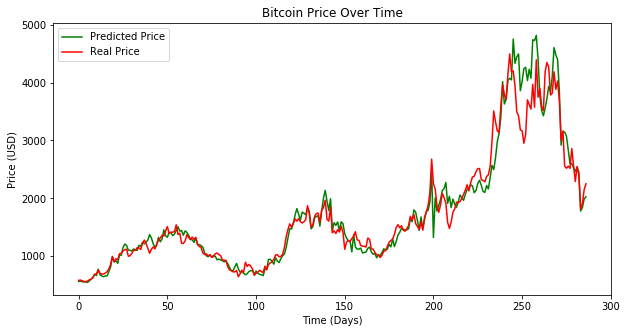

In [30]:
y_predict, real_y_test, real_y_predict, fig1 = test_model(model, X_test, Y_test, unnormalized_bases)

#Show the plot
plt.show(fig1)

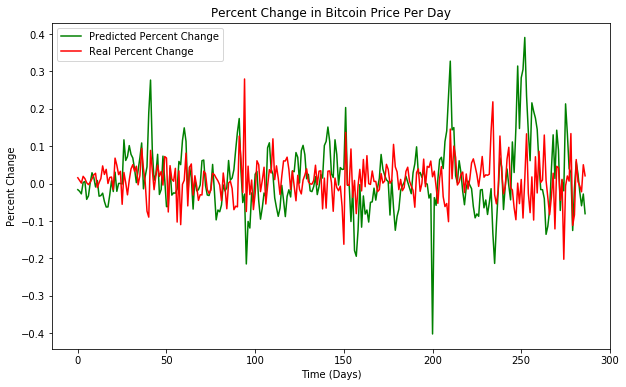

In [31]:
Y_daybefore, Y_test, delta_predict, delta_real, fig2 = price_change(Y_daybefore, Y_test, y_predict)

#Show the plot
plt.show(fig2)

In [32]:
delta_predict_1_0, delta_real_1_0 = binary_price(delta_predict, delta_real)

print (delta_predict_1_0.shape)
print (delta_real_1_0.shape)

(287, 1)
(287, 1)


In [33]:
true_pos, false_pos, true_neg, false_neg = find_positives_negatives(delta_predict_1_0, delta_real_1_0)
print ("True positives:", true_pos)
print ("False positives:", false_pos)
print ("True negatives:", true_neg)
print ("False negatives:", false_neg)

True positives: 94
False positives: 52
True negatives: 59
False negatives: 82


In [34]:
precision, recall, F1, MSE = calculate_statistics(true_pos, false_pos, true_neg, false_neg, y_predict, Y_test)
print ("Precision:", precision)
print ("Recall:", recall)
print ("F1 score:", F1)
print ("Mean Squared Error:", MSE)

Precision: 0.6438356164383562
Recall: 0.5340909090909091
F1 score: 0.5838509316770186
Mean Squared Error: 0.0361913887973
